/data/keeling/a/yulanh/c/BW_backup/mydata/radar-lidar_out/CAL_ACLAY/Parallel_1/output/Sep_wus1708_aerosol_layerthickness_tau_tauerr.txt
cloudy, mean,max 0.12503918 3.3843064 (1693,) clear 0.08316561 (1621,)
clear > 0.2 number 0.0567550894509562
clear < 0.2 number 0.9432449105490438
cloudy > 0.2 number 0.15062020082693445
cloudy < 0.2 number 0.8493797991730656


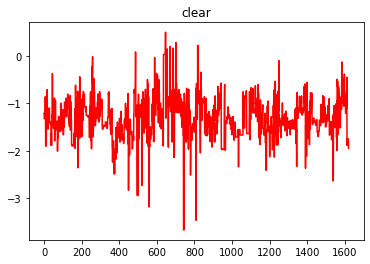

finish


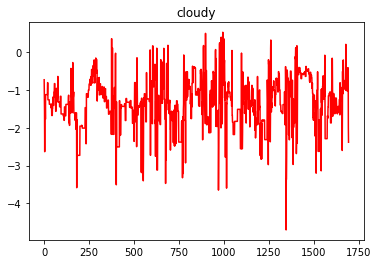

In [19]:
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fnames=glob.glob('/data/keeling/a/yulanh/c/BW_backup/mydata/radar-lidar_out/CAL_ACLAY/Parallel_1/output/Sep_wus1708_aerosol_layerthickness_tau_tauerr.txt')

cldflag=np.empty((0),'i')
aodtau =np.empty((0),'f')
tauerr =np.empty((0),'f')
aerothick=np.empty((0),'f')

for fi in range(len(fnames)):
    print(fnames[fi])
    data=read_text(fnames[fi])
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)
    dataT=np.zeros((Nrow,Ncol),'f')
    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
        for j in range(len(splitcol)):
            if splitcol[j] != '' and splitcol[j] != '\n' and len(splitcol[j]) < 20 :
                dataT[i,k]=float(splitcol[j])
                k=k+1

    cldflag=np.append(cldflag,dataT[:,0])
    aodtau=np.append(aodtau,dataT[:,1])
    tauerr=np.append(tauerr,dataT[:,2])
    aerothick=np.append(aerothick,dataT[:,3])

        
ind=np.where(cldflag == 1)[0]
cld_aod=aodtau[ind]
cld_aoderr=tauerr[ind]
cld_aerothick=aerothick[ind]

ind=np.where(cldflag == 0)[0]
clr_aod=aodtau[ind]
clr_aoderr=tauerr[ind]
clr_aerothick=aerothick[ind]

print('cloudy, mean,max',np.mean(cld_aod),np.max(cld_aod),cld_aod.shape,'clear',np.mean(clr_aod),clr_aod.shape)

#=== segegrated into tau 0.2
ind=np.where(clr_aod >= 0.2)[0]
clr_aod_L = clr_aod[ind]
clr_aoderr_L = clr_aoderr[ind]
clr_aerothick_L = clr_aerothick[ind]
print('clear > 0.2 number',len(ind)/clr_aod.shape[0])

ind=np.where(clr_aod < 0.2)[0]
clr_aod_S = clr_aod[ind]
clr_aoderr_S = clr_aoderr[ind]
clr_aerothick_S = clr_aerothick[ind]
print('clear < 0.2 number',len(ind)/clr_aod.shape[0])

ind=np.where(cld_aod >= 0.2)[0]
cld_aod_L = cld_aod[ind]
cld_aoderr_L = cld_aoderr[ind]
cld_aerothick_L = cld_aerothick[ind]
print('cloudy > 0.2 number',len(ind)/cld_aod.shape[0])

ind=np.where(cld_aod < 0.2)[0]
cld_aod_S = cld_aod[ind]
cld_aoderr_S = cld_aoderr[ind]
cld_aerothick_S = cld_aerothick[ind]
print('cloudy < 0.2 number',len(ind)/cld_aod.shape[0])

plt.plot(np.log10(clr_aod),'r')
plt.title('clear')
plt.show()
plt.plot(np.log10(cld_aod),'r')
plt.title('cloudy')

print('finish')

small 0.06682972 0.02798013 0.08039305 0.02563666
big 0.7233397 0.39327636 0.37314942 0.13894716
all 0.17042187 0.08562103 0.115344025 0.03916433
thick cld, clr 1.2812643 1.4932435


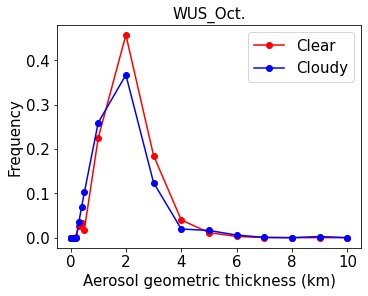

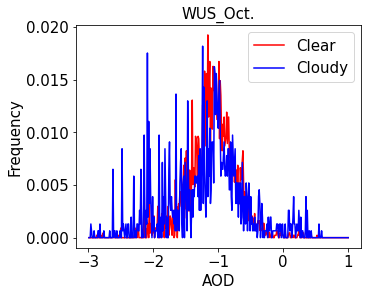

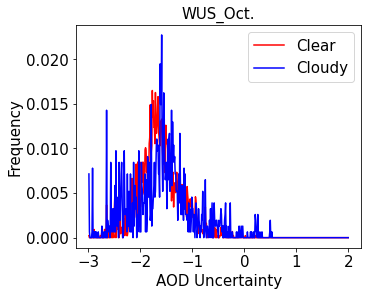

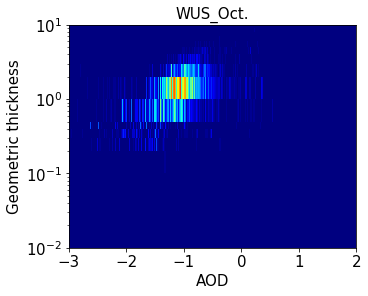

/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


TypeError: '<=' not supported between instances of 'str' and 'float'

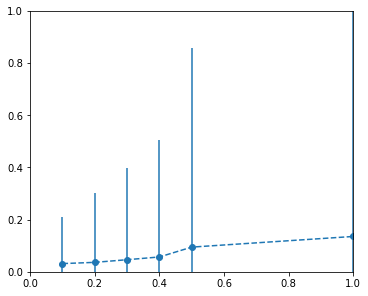

In [2]:
region='WUS_Oct.'
print('small',np.mean(cld_aod_S),np.mean(cld_aoderr_S),np.mean(clr_aod_S),np.mean(clr_aoderr_S))
print('big',np.mean(cld_aod_L),np.mean(cld_aoderr_L),np.mean(clr_aod_L),np.mean(clr_aoderr_L))
print('cld, clr,all',np.mean(cld_aod),np.mean(cld_aoderr),np.mean(clr_aod),np.mean(clr_aoderr))
print('thick cld, clr',np.mean(cld_aerothick),np.mean(clr_aerothick))

clr_thick_his=np.histogram(clr_aerothick,bins=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10])
cld_thick_his=np.histogram(cld_aerothick,bins=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10])
x=[0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10]
fontsz=15
fig,ax=plt.subplots(1,figsize=([5,4]),constrained_layout=True)
p1=ax.plot(x,clr_thick_his[0]/len(clr_aerothick),'ro-')
p2=ax.plot(x,cld_thick_his[0]/len(cld_aerothick),'bo-')
ax.set_xlabel('Aerosol geometric thickness (km)',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(['Clear','Cloudy'],loc=0,fontsize=fontsz)
ax.set_title(region,fontsize=fontsz)
plt.show()

clr_aod_1=np.log10(clr_aod)
cld_aod_1=np.log10(cld_aod)
Ntau=401
aodbins=np.arange(Ntau)*0.01-3
clr_aod_his=np.histogram(clr_aod_1,bins=aodbins)
cld_aod_his=np.histogram(cld_aod_1,bins=aodbins)
fig,ax=plt.subplots(1,figsize=([5,4]),constrained_layout=True)
p1=ax.plot(aodbins[1:Ntau+1],clr_aod_his[0]/len(clr_aod_1),'r')
p2=ax.plot(aodbins[1:Ntau+1],cld_aod_his[0]/len(cld_aod_1),'b')
ax.set_xlabel('AOD',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(['Clear','Cloudy'],loc=0,fontsize=fontsz)
ax.set_title(region,fontsize=fontsz)
plt.show()

clr_aoderr_1=np.log10(clr_aoderr)
cld_aoderr_1=np.log10(cld_aoderr)
Ntau=501
aodbins=np.arange(Ntau)*0.01-3
clr_aoderr_his=np.histogram(clr_aoderr_1,bins=aodbins)
cld_aoderr_his=np.histogram(cld_aoderr_1,bins=aodbins)
fig,ax=plt.subplots(1,figsize=([5,4]),constrained_layout=True)
p1=ax.plot(aodbins[1:Ntau+1],clr_aoderr_his[0]/len(clr_aoderr_1),'r')
p2=ax.plot(aodbins[1:Ntau+1],cld_aoderr_his[0]/len(cld_aoderr_1),'b')
ax.set_xlabel('AOD Uncertainty',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(['Clear','Cloudy'],loc=0,fontsize=fontsz)
ax.set_title(region,fontsize=fontsz)
plt.show()

#===== thickness vs. aod =======
fig,ax=plt.subplots(1,figsize=([5,4]),constrained_layout=True)
h2d = ax.hist2d(np.log10(aodtau),aerothick,bins=[aodbins,x],cmap='jet')
ax.set_xlabel('AOD',fontsize=15)
ax.set_ylabel('Geometric thickness',fontsize=15)
ax.tick_params(labelsize=15)
ax.set_title(region,fontsize=fontsz)
ax.set_yscale('log')
plt.show()

x=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10]
Nx=len(x)
tau_mean=np.zeros((Nx),'f')
tau_err =np.zeros((Nx),'f')



for xi in range(Nx):
    if xi < Nx-1:
        ind=np.where((aerothick > x[xi]) & (aerothick <= x[xi+1]))[0]
        tau_mean[xi]=np.mean(aodtau[ind])
        tau_err[xi] =np.mean(aerothick[ind])
    if xi >= Nx-1:
        ind=np.where((aerothick > x[xi]))[0]
        tau_mean[xi]=np.mean(aodtau[ind])
        tau_err[xi] =np.mean(aerothick[ind])
        
fig,ax=plt.subplots(1,figsize=([5,4]),constrained_layout=True)
p1=ax.errorbar(x, tau_mean, tau_err, linestyle='dashed', marker='o')
ax.set_ylabel('AOD',fontsize=15)
ax.set_xlabel('Geometric thickness',fontsize=15)
ax.tick_params(labelsize=15)
ax.xaxis.set_minor_locator(MultipleLocator(9))
ax.tick_params(which='minor', length=2)
ax.set_title(region,fontsize=fontsz)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([0.01,10])
p1[-1][0].set_linestyle('dashed')
#ax.xaxis.set_minor_locator(MultipleLocator(9))
plt.show()

